In [22]:
import pandas as pd

df = pd.read_csv('/home/pilli007/Documents/pes-sem2/ML/pes_ml/datasets/Social_Network_Ads.csv')

df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


Logistic regression binary class classification

In [23]:
del df['User ID']

df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [24]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [25]:
df.shape

(400, 4)

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Gender'] = le.fit_transform(df[['Gender']])

df.head()

/home/pilli007/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [27]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

df['EstimatedSalary'] = mm.fit_transform(df[['EstimatedSalary']])

df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,0.029630,0
1,1,35,0.037037,0
2,0,26,0.207407,0
3,0,27,0.311111,0
4,1,19,0.451852,0


In [28]:
df.columns 

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [29]:
X = df.iloc[:, :-1]
y = df.iloc[:, df.columns.size-1:]

y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [30]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(xTrain, yTrain)

/home/pilli007/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [32]:
print(lr.score(xTrain, yTrain))

print(lr.score(xTest, yTest))

0.8625
0.8625


In [33]:
yPred = lr.predict(xTest)

In [34]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

print(accuracy_score(yTest, yPred))
print(recall_score(yTest, yPred))
print(precision_score(yTest, yPred))
print(f1_score(yTest, yPred))

confusion_matrix(yTest, yPred)

0.8625
0.875
0.8
0.8358208955223881


array([[41,  7],
       [ 4, 28]])

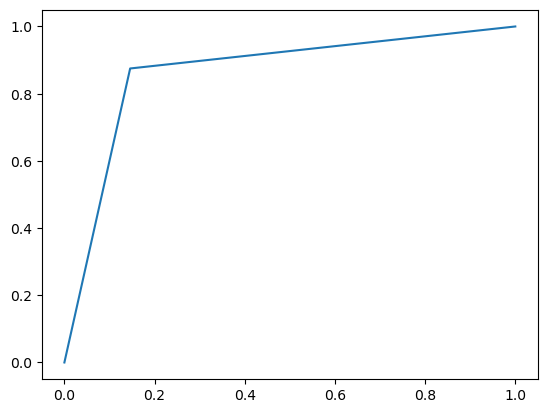

In [35]:
import matplotlib.pyplot as plt

def plot_roc_curve(yTest, yPred):
    fpr, tpr, threshold = roc_curve(yTest, yPred)
    plt.plot(fpr, tpr)


plot_roc_curve(yTest, yPred)

<Axes: >

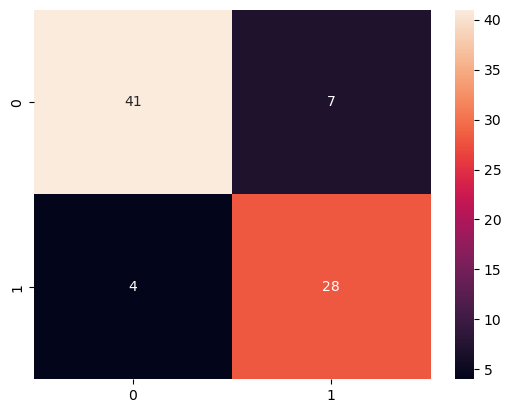

In [36]:
cm = confusion_matrix(yTest, yPred)

import seaborn as sns

sns.heatmap(cm, annot=True)

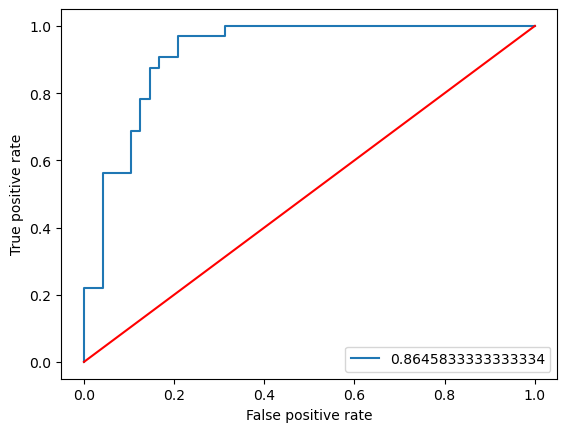

In [37]:
auc=roc_auc_score(yTest,yPred)
fpr,tpr,threshold=roc_curve(yTest,lr.predict_proba(xTest)[:,1])

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot(fpr,tpr,label=auc)
plt.plot([0,1],[0,1],'r')
plt.legend(loc="lower right")
plt.show()

In [38]:
lr.predict_proba(xTest)[:,-1]

array([0.09601743, 0.26610009, 0.50394792, 0.68118389, 0.09437872,
       0.24589523, 0.00328857, 0.88147085, 0.02406346, 0.95990005,
       0.14378304, 0.33276329, 0.19487935, 0.94028387, 0.92531166,
       0.99064117, 0.984981  , 0.02960867, 0.06537154, 0.99087935,
       0.39407989, 0.88483511, 0.89278911, 0.5889537 , 0.37361286,
       0.00781132, 0.93394633, 0.83312653, 0.77585281, 0.95908632,
       0.20326255, 0.00891951, 0.00807795, 0.96466996, 0.04963515,
       0.09380585, 0.0036325 , 0.13739745, 0.55788393, 0.00231645,
       0.94732713, 0.98343063, 0.38020449, 0.0136553 , 0.93835562,
       0.23158797, 0.55138942, 0.88755554, 0.36904403, 0.75685878,
       0.01587831, 0.18263721, 0.53180924, 0.4375209 , 0.52364962,
       0.19580692, 0.95664948, 0.14962634, 0.98062294, 0.85750599,
       0.06500361, 0.02073805, 0.53194528, 0.10374652, 0.38014011,
       0.71481473, 0.01135983, 0.4654933 , 0.85167149, 0.17959274,
       0.80250255, 0.08983379, 0.53855356, 0.35534513, 0.01772

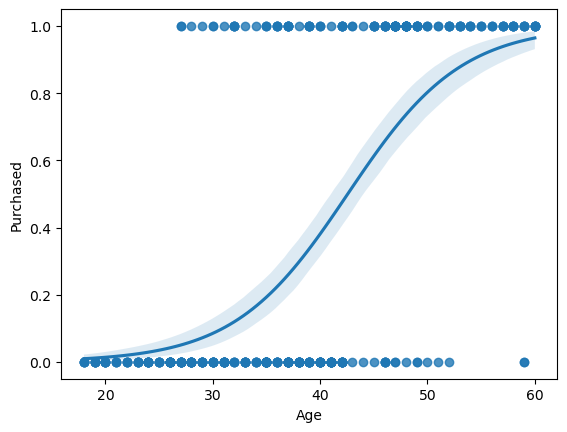

In [40]:
sns.regplot(data=df, x='Age', y='Purchased', logistic=True)
plt.show()